In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
nyc_cd = gpd.read_file('../data/Community_Districts.geojson')
print(nyc_cd.crs)
nyc_cd.head()

epsg:4326


,boro_cd,shape_area,shape_leng,geometry
0,206,42664311.5086,35875.7117328,"MULTIPOLYGON (((-73.87185 40.84376, -73.87192 ..."
1,404,65739661.969,37018.3738392,"MULTIPOLYGON (((-73.84751 40.73901, -73.84801 ..."
2,304,56662613.1611,37007.806599,"MULTIPOLYGON (((-73.89647 40.68234, -73.89653 ..."
3,205,38316975.1292,29443.0481287,"MULTIPOLYGON (((-73.89138 40.86170, -73.89142 ..."
4,207,53311689.1,44812.1474256,"MULTIPOLYGON (((-73.87519 40.87158, -73.87619 ..."


In [3]:
nyc_cd.head()

,boro_cd,shape_area,shape_leng,geometry
0,206,42664311.5086,35875.7117328,"MULTIPOLYGON (((-73.87185 40.84376, -73.87192 ..."
1,404,65739661.969,37018.3738392,"MULTIPOLYGON (((-73.84751 40.73901, -73.84801 ..."
2,304,56662613.1611,37007.806599,"MULTIPOLYGON (((-73.89647 40.68234, -73.89653 ..."
3,205,38316975.1292,29443.0481287,"MULTIPOLYGON (((-73.89138 40.86170, -73.89142 ..."
4,207,53311689.1,44812.1474256,"MULTIPOLYGON (((-73.87519 40.87158, -73.87619 ..."


In [4]:
type(nyc_cd)

geopandas.geodataframe.GeoDataFrame

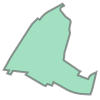

In [5]:
nyc_cd.loc[0, 'geometry']

In [6]:
print(nyc_cd.loc[0, 'geometry'])

MULTIPOLYGON (((-73.8718461029101 40.84376077785583, -73.87191691517283 40.84345374264658, -73.87196432156817 40.84323825377388, -73.87213357846727 40.842497794549, -73.87231748546176 40.84169028202043, -73.87234056327031 40.8415836261895, -73.87236365249346 40.84147696098339, -73.87239558060885 40.84133637543188, -73.872527839146 40.84075398300686, -73.87267805874693 40.84013719710676, -73.87277204658531 40.83975128233606, -73.87298042939128 40.83895248518574, -73.87312728158687 40.83833509641596, -73.87314714674842 40.83826389897314, -73.87317603928548 40.83816583089295, -73.87332746697363 40.83765194933224, -73.87334834302327 40.83759200855819, -73.8735176630578 40.83711442819023, -73.87359053263883 40.83689652518782, -73.87361760595988 40.83681877899325, -73.8737582282926 40.83639819478505, -73.87377308806087 40.83635875143833, -73.87383696556059 40.83636111808446, -73.87389295864384 40.83636341241558, -73.87425833254026 40.83637900224392, -73.87507837210686 40.83642309897043, -73.

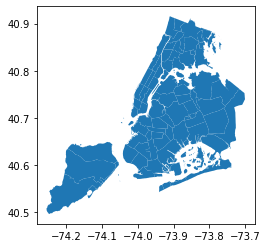

In [7]:
nyc_cd.plot();

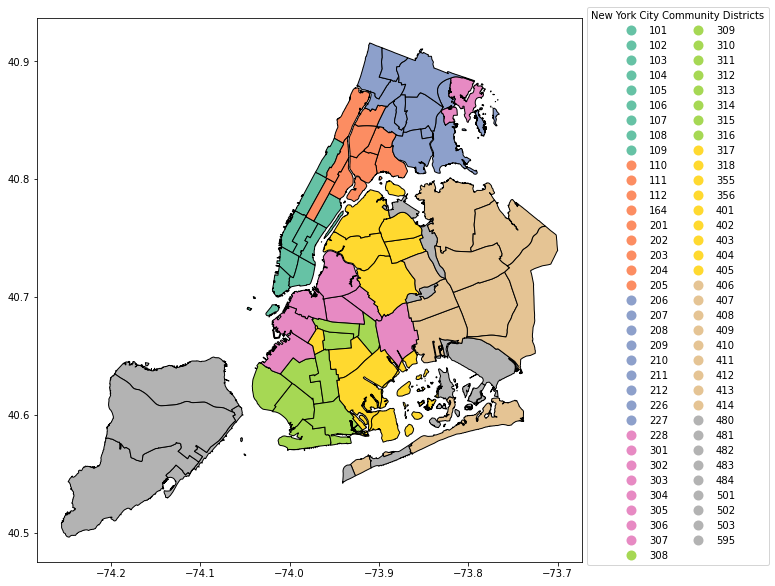

In [8]:
leg_kwds = {'title': 'New York City Community Districts', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

nyc_cd.plot(column = 'boro_cd', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [9]:
healthy_stores = pd.read_csv('../data/Recognized_Shop_Healthy_Stores.csv')
print(healthy_stores.shape)
healthy_stores.head(3)

(368, 17)


,Store_Name,Street,Address,Street_Address,Borough,Zip,Year_Awarded,Program_Wave,Latitude,Longitude,Community_District_Full_Name,Community_District,Council_District,Census_Tract,BIN,BBL,NTA
0,SIRAH 1720 LLC,535 MARCY AVE,NaN,535 MARCY AVE,Brooklyn,11206,2020,8,40.696961,-73.949512,Brooklyn Community District 3,303,36.0,257.0,3338591.0,3.017390e+09,Bedford
1,FIRST STOP GROCERY INC,643 MARCY AVE,NaN,643 MARCY AVE,Brooklyn,11206,2020,8,40.692552,-73.948632,Brooklyn Community District 3,303,36.0,261.0,3049316.0,3.017710e+09,Bedford
2,AANDE DIRECT LLC,40 LEWIS AVE,NaN,40 LEWIS AVE,Brooklyn,11206,2020,8,40.696576,-73.937777,Brooklyn Community District 3,303,36.0,283.0,3042883.0,3.015850e+09,Stuyvesant Heights


In [10]:
healthy_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Store_Name                    368 non-null    object 
 1   Street                        368 non-null    object 
 2   Address                       294 non-null    object 
 3   Street_Address                368 non-null    object 
 4   Borough                       368 non-null    object 
 5   Zip                           368 non-null    int64  
 6   Year_Awarded                  368 non-null    int64  
 7   Program_Wave                  368 non-null    int64  
 8   Latitude                      368 non-null    float64
 9   Longitude                     368 non-null    float64
 10  Community_District_Full_Name  368 non-null    object 
 11  Community_District            368 non-null    int64  
 12  Council_District              353 non-null    float64
 13  Censu

In [11]:
healthy_stores['geometry'] = healthy_stores.apply(lambda x: Point((x.Longitude, 
                                                         x.Latitude)), 
                                        axis=1)
healthy_stores.head(3)

,Store_Name,Street,Address,Street_Address,Borough,Zip,Year_Awarded,Program_Wave,Latitude,Longitude,Community_District_Full_Name,Community_District,Council_District,Census_Tract,BIN,BBL,NTA,geometry
0,SIRAH 1720 LLC,535 MARCY AVE,NaN,535 MARCY AVE,Brooklyn,11206,2020,8,40.696961,-73.949512,Brooklyn Community District 3,303,36.0,257.0,3338591.0,3.017390e+09,Bedford,POINT (-73.949512 40.696961)
1,FIRST STOP GROCERY INC,643 MARCY AVE,NaN,643 MARCY AVE,Brooklyn,11206,2020,8,40.692552,-73.948632,Brooklyn Community District 3,303,36.0,261.0,3049316.0,3.017710e+09,Bedford,POINT (-73.948632 40.692552)
2,AANDE DIRECT LLC,40 LEWIS AVE,NaN,40 LEWIS AVE,Brooklyn,11206,2020,8,40.696576,-73.937777,Brooklyn Community District 3,303,36.0,283.0,3042883.0,3.015850e+09,Stuyvesant Heights,POINT (-73.937777 40.696576)


In [12]:
nyc_cd.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
hs_geo = gpd.GeoDataFrame(healthy_stores, 
                           crs = nyc_cd.crs, 
                           geometry = healthy_stores['geometry'])

In [14]:
type(hs_geo)

geopandas.geodataframe.GeoDataFrame

In [15]:
nyc_cd = nyc_cd[['boro_cd', 'geometry']]

In [16]:
hs_cd = gpd.sjoin(hs_geo, nyc_cd , op = 'within')

In [17]:
hs_cd.head()

,Store_Name,Street,Address,Street_Address,Borough,Zip,Year_Awarded,Program_Wave,Latitude,Longitude,Community_District_Full_Name,Community_District,Council_District,Census_Tract,BIN,BBL,NTA,geometry,index_right,boro_cd
0,SIRAH 1720 LLC,535 MARCY AVE,NaN,535 MARCY AVE,Brooklyn,11206,2020,8,40.696961,-73.949512,Brooklyn Community District 3,303,36.0,257.0,3338591.0,3.017390e+09,Bedford,POINT (-73.94951 40.69696),7,303
1,FIRST STOP GROCERY INC,643 MARCY AVE,NaN,643 MARCY AVE,Brooklyn,11206,2020,8,40.692552,-73.948632,Brooklyn Community District 3,303,36.0,261.0,3049316.0,3.017710e+09,Bedford,POINT (-73.94863 40.69255),7,303
2,AANDE DIRECT LLC,40 LEWIS AVE,NaN,40 LEWIS AVE,Brooklyn,11206,2020,8,40.696576,-73.937777,Brooklyn Community District 3,303,36.0,283.0,3042883.0,3.015850e+09,Stuyvesant Heights,POINT (-73.93778 40.69658),7,303
4,194 THROOP FOOD CORP,777 PARK AVE,NaN,777 PARK AVE,Brooklyn,11206,2020,8,40.698191,-73.944311,Brooklyn Community District 3,303,36.0,257.0,3335580.0,3.017320e+09,Bedford,POINT (-73.94431 40.69819),7,303
10,164 TOMPKIN DELI,164 TOMPKINS ST,NaN,164 TOMPKINS ST,Brooklyn,11206,2020,8,40.693300,-73.946200,Brooklyn Community District 3,303,NaN,NaN,NaN,NaN,Bedford,POINT (-73.94620 40.69330),7,303


In [18]:
hs_cd['boro_cd'].value_counts()

111    70
205    58
206    42
316    39
305    38
203    24
110    20
202    18
301    12
317    12
204     9
303     8
207     7
201     7
304     4
Name: boro_cd, dtype: int64

In [19]:
hs_cd['Community_District'].value_counts()

111    70
205    58
206    42
316    39
305    38
203    24
110    20
202    18
301    12
317    12
204     9
303     8
207     7
201     7
304     4
Name: Community_District, dtype: int64

In [20]:
hs_111 = hs_cd.loc[hs_cd['Community_District'] == '111']
hs_111.shape

(0, 20)

In [21]:
polygon_111 = nyc_cd.loc[nyc_cd['boro_cd']=='111']
polygon_111.shape

(1, 2)

In [22]:
ax = polygon_111.plot(figsize = (8, 10), color = 'lightgreen')
hs_111.plot( ax = ax, column = 'Community_District');
plt.show();

C:\Users\ljcoo\anaconda3\envs\geospatial\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


ValueError: cannot convert float NaN to integer

<Figure size 576x720 with 1 Axes>

In [23]:
polygon_111.centroid

C:\Users\ljcoo\AppData\Local\Temp\ipykernel_22696\4201513995.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon_111.centroid


67    POINT (-73.93498 40.79491)
dtype: geometry

In [24]:
center = polygon_111.geometry.centroid[67]

C:\Users\ljcoo\AppData\Local\Temp\ipykernel_22696\1832956589.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon_111.geometry.centroid[67]


In [25]:
area_center = [center.y, center.x]
print(area_center)

[40.79490751670958, -73.93497696576925]


In [26]:
map_111 = folium.Map(location =  area_center, zoom_start = 12)
map_111

In [27]:
i = 0
for row_index, row_values in hs_111.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

In [28]:
map_111 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon_111).add_to(map_111)

for row_index, row_values in hs_111.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Store_Name'])
    icon=folium.Icon(color="blue",icon="shopping-cart", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_111)
map_111.save('../maps/healthystoresmap111.html')

map_111

In [29]:
folium.Map?

In [30]:
cluster_map_111 = folium.Map(location =  area_center, zoom_start = 12)

marker_cluster = MarkerCluster().add_to(cluster_map_111)

folium.GeoJson(polygon_111).add_to(cluster_map_111)

for row_index, row_values in hs_111.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Store_Name'])
    icon=folium.Icon(color="blue",icon="shopping-cart", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

cluster_map_111.save('../maps/clusterhs111.html')

cluster_map_111